In [1]:
#import necessary packages: pandas, matplotlib, seaborn, and sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#change to seaborn's color style
sns.set(color_codes = True)

#remove output warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
#source: https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects
rocks = pd.read_csv('https://raw.githubusercontent.com/lwpondscum/CISC9600_Lab_5/main/neo_v2.csv')

In [3]:
#preview data
rocks.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.24922,54839744.08,Earth,False,16.73,0
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.72666,61438126.52,Earth,False,20.00,1
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.69210,49798724.94,Earth,False,17.83,0
3,3596030,(2012 BV13),0.096506,0.215794,24764.30314,25434972.72,Earth,False,22.20,0
4,3667127,(2014 GE35),0.255009,0.570217,42737.73376,46275567.00,Earth,False,20.09,1


In [4]:
#preview data
rocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  int64  
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 6.3+ MB


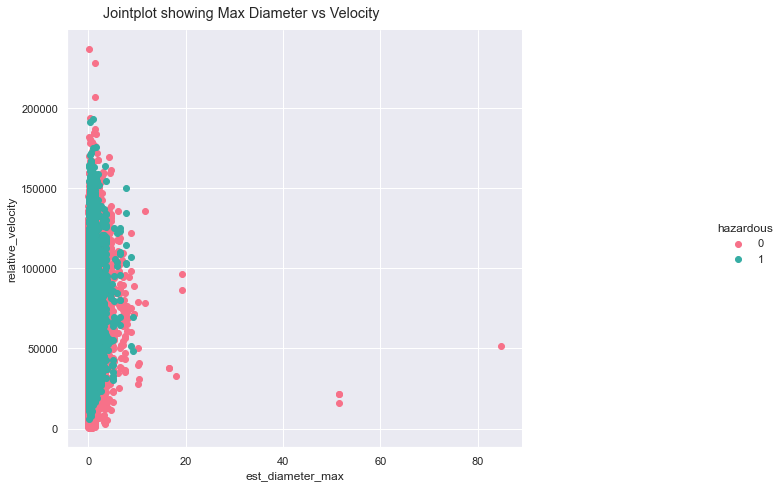

In [5]:
#creates a joint plot of estimated maximum diameter vs relative velocity colored by hazard level
rp = sns.FacetGrid(rocks, hue = 'hazardous', palette = 'husl').map(plt.scatter, 'est_diameter_max', 'relative_velocity').add_legend()
rp.fig.suptitle('Jointplot showing Max Diameter vs Velocity')
plt.gcf().set_size_inches(15, 8)
plt.show()

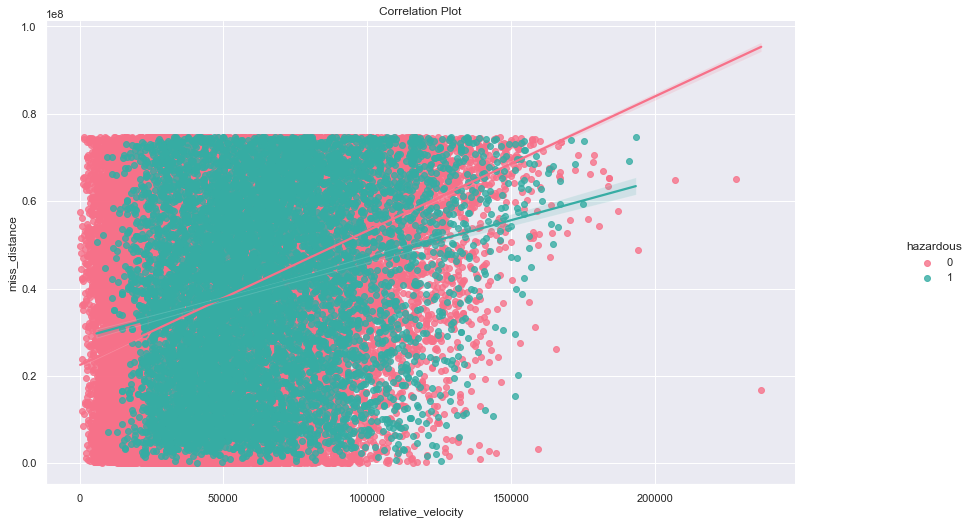

In [6]:
#creates a lineplot of relative velocity vs miss distance
sns.lmplot(x = 'relative_velocity', y = 'miss_distance', data = rocks, hue = 'hazardous', palette = 'husl').set(title = "Correlation Plot")
plt.gcf().set_size_inches(15, 8)
plt.show()

In [7]:
#drops the nonbinary text field
rocks_mod = rocks.drop(['id','name', 'orbiting_body', 'sentry_object'], axis = 1)

In [8]:
rocks_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 4.2 MB


In [9]:
#creates a correlation matrix for the dataset
rocks_mod.corr()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
est_diameter_min,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
est_diameter_max,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
relative_velocity,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185
miss_distance,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302
absolute_magnitude,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267
hazardous,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000


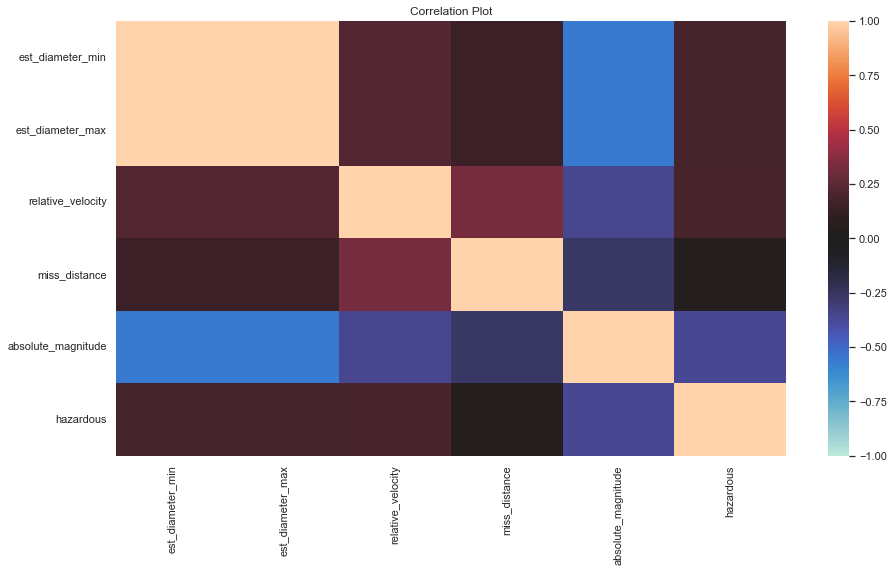

In [10]:
#creates heatmap for dataset
sns.heatmap(rocks_mod.corr(), vmin = -1, vmax = 1, cmap = 'icefire')
plt.title('Correlation Plot')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [11]:
#creates training and test sets of .70 to .30 ratio
X = rocks_mod.drop(['hazardous'], axis = 1)
y = rocks_mod['hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 666)

In [12]:
#perform standardization on X sets
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
#creates and trains decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
#creates and trains random forest model
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=10, random_state=1)

In [15]:
#cross-validate decision tree model
folds = KFold(n_splits = 5)
result1 = cross_val_score(dt, X_train, y_train.ravel(), cv = folds, scoring = 'accuracy')

print(f' Avg accuracy:{result1.mean()}')

 Avg accuracy:0.890461586852245


In [16]:
#cross-validate random forest model
result2 = cross_val_score(rf, X_train, y_train.ravel(), cv = folds, scoring = 'accuracy')

print(f' Avg accuracy:{result2.mean()}')

 Avg accuracy:0.9123378155225289


In [17]:
#have models predict test set
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [18]:
#classification report for decision tree
print(classification_report(y_test, y_pred_dt, target_names = ['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.94      0.94      0.94     24537
    negative       0.45      0.45      0.45      2714

    accuracy                           0.89     27251
   macro avg       0.70      0.69      0.70     27251
weighted avg       0.89      0.89      0.89     27251



In [19]:
#classification report for SVM
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     24537
           1       0.61      0.39      0.47      2714

    accuracy                           0.91     27251
   macro avg       0.77      0.68      0.71     27251
weighted avg       0.90      0.91      0.91     27251

